In [2]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot, num_grad_hug_hop, num_grad_thug_hop
np.set_printoptions(suppress=True)

In [3]:
folder = "dumper3/" #"dumper2/"
# experiment30: simply experiment30 with N=10k and epsilon 0.1, 0.001, 0.0000001
# dumper2: experiment30 with N=20k and epsilon 0.1, 0.0001, 0.00001
# dumper3: experiment30 saving also ESS joint for both kernels. N=20k

# HUG
THETA_ESS_HUG = load(folder + "THETA_ESS_HUG.npy")
U_ESS_HUG     = load(folder + "U_ESS_HUG.npy")
ESS_HUG       = load(folder + "ESS_JOINT_HUG.npy")
ESS_HUG_TOT   = load(folder + "ESS_JOINT_TOT_HUG.npy")
A_HUG         = load(folder + "A_HUG.npy")
RMSE_HUG      = load(folder + "RMSE_HUG.npy")
EJSD_HUG      = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG    = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG    = load(folder + "T_EJSD_HUG.npy")
A_HOP_HUG     = load(folder + "A_HOP_HUG.npy")
N_UNIQUE_HUG  = load(folder + "N_UNIQUE_HUG.npy")


# HUG AR
THETA_ESS_THUG = load(folder + "THETA_ESS_THUG.npy")
U_ESS_THUG     = load(folder + "U_ESS_THUG.npy")
ESS_THUG       = load(folder + "ESS_JOINT_THUG.npy")
ESS_THUG_TOT   = load(folder + "ESS_JOINT_TOT_THUG.npy")
A_THUG         = load(folder + "A_THUG.npy")
RMSE_THUG      = load(folder + "RMSE_THUG.npy")
EJSD_THUG      = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG    = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG    = load(folder + "T_EJSD_THUG.npy")
N_UNIQUE_THUG  = load(folder + "N_UNIQUE_THUG.npy")


# COMMON
EPSILONS       = load(folder + "EPSILONS.npy")
TS             = load(folder + "TS.npy")
time           = load(folder + "TIME.npy")
ALPHAS         = load(folder + "ALPHAS.npy")

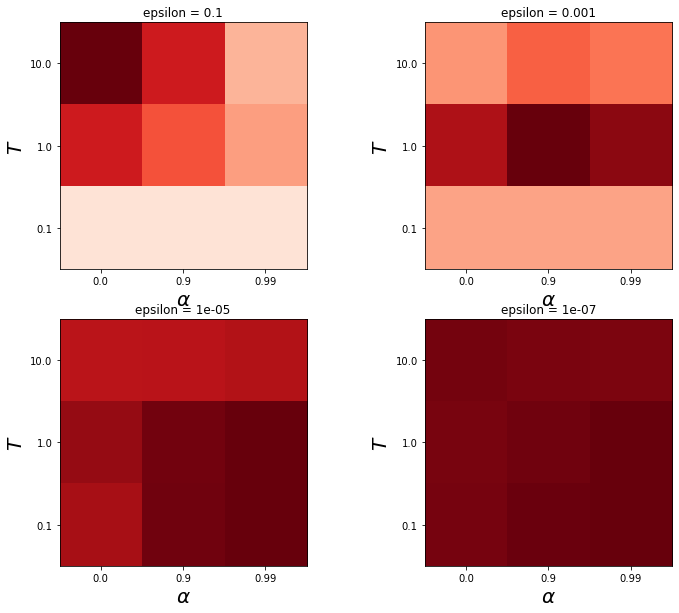

In [4]:
string_alphas = ['0.0'] + [str(a) for a in ALPHAS]
string_ts = [str(T) for T in TS]
data_list = [
    np.hstack((ESS_HUG[:, i, :].mean(axis=0).reshape(-1, 1), ESS_THUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

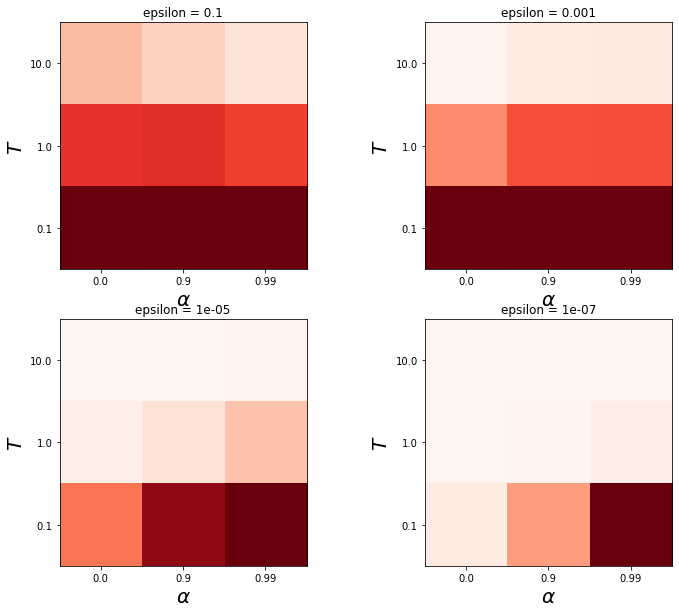

In [46]:
string_alphas = ['0.0'] + [str(a) for a in ALPHAS]
string_ts = [str(T) for T in TS]
data_list = [
    np.hstack((A_HUG[:, i, :].mean(axis=0).reshape(-1, 1), A_THUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

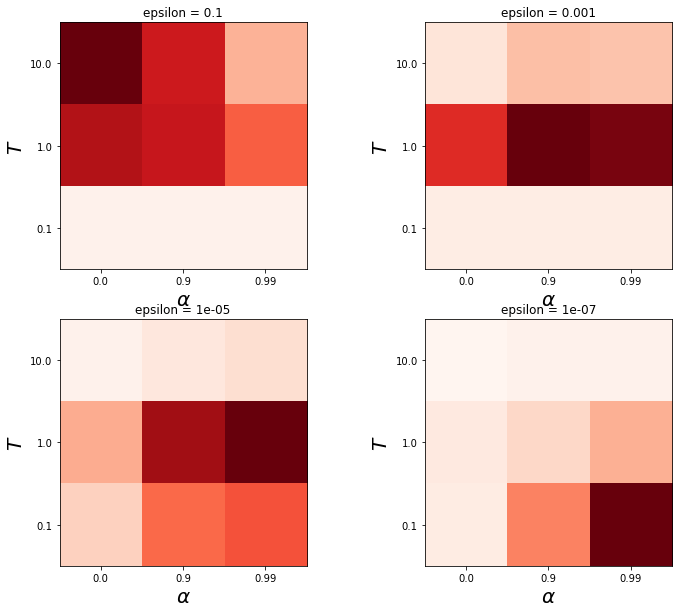

In [23]:
string_alphas = ['0.0'] + [str(a) for a in ALPHAS]
string_ts = [str(T) for T in TS]
data_list = [
    np.hstack((EJSD_HUG[:, i, :].mean(axis=0).reshape(-1, 1), EJSD_THUG[:, i, :, :].mean(axis=0))) for i in range(len(EPSILONS))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS)):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()